In [5]:
#Daily Challenge: Analysis of Airplane Crashes and Fatalities

##Utilize Python, Pandas, NumPy, and SciPy to conduct a thorough analysis of the “Airplane Crashes and Fatalities upto 2023” dataset. This challenge will encompass data cleaning, exploratory analysis, statistical testing, and visualization to draw meaningful insights.

#Task 1: Data Import and Cleaning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()

df = pd.read_csv("Airplane_crashes.csv", encoding='latin1') #it didn't read it

# Take a quick look
print(df.shape)
print(df.columns)
print(df.info())
print(df.head())


Saving Airplane_crashes.csv to Airplane_crashes.csv
(4998, 17)
Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'AC Type',
       'Registration', 'cn/ln', 'Aboard', 'Aboard Passangers', 'Aboard Crew',
       'Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground',
       'Summary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-

The total number of airplane crashes was 4980, which resulted in 111561 deaths, with those onboard having a 28.19% rate of survival


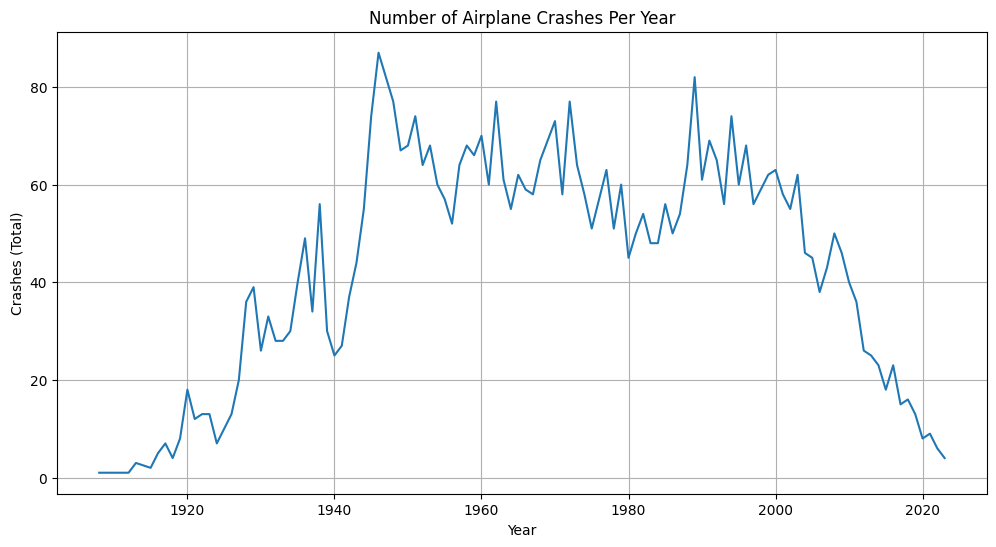

In [6]:
##Task 1: Data Cleaning (Continued)
import matplotlib.pyplot as plt

df.isnull().sum().sort_values(ascending=False)

df_process = df.copy()

df_process = df_process.dropna(subset=['Fatalities']) #dropped 8 missing
df_process = df_process.dropna(subset=['Aboard'])

#set data type, convert date/extract year

df_process['Fatalities'] = df_process['Fatalities'].astype('int32')
df_process['Aboard'] = df_process['Aboard'].astype('int32')
df_process['Date'] = pd.to_datetime(df_process['Date'], errors='coerce')
df_process['Year'] = df_process['Date'].dt.year #getting the year only
df_process.isnull().sum().sort_values(ascending=False)

#Task 2: Exploratory Data Analysis - Use Pandas to explore basic statistics such as the number of crashes, fatalities, and survival rates. Analyze the frequency of crashes over time to identify any trends.

#set up formulas to determine number of crashes, fatalities, and surivival rates
total_fatalities = df_process['Fatalities'].sum()
total_crashes = len(df_process)
df_process['survival'] = df_process['Aboard'] - df_process['Fatalities']
df_process['survival_rate'] = (df_process['survival'] / df_process['Aboard']).round(2)
overall_rate = overall_rate = df_process['survival'].sum() / df_process['Aboard'].sum()

print(f"The total number of airplane crashes was {total_crashes}, which resulted in {int(total_fatalities)} deaths, with those onboard having a {overall_rate:.2%} rate of survival")

#Output: The total number of airplane crashes was 4980, which resulted in 111561 deaths, with those onboard having a 28.19% rate of survival


#Analyze the frequency of crashes over time to identify any trends.

frequency = df_process['Year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
frequency.plot(kind='line')
plt.title('Number of Airplane Crashes Per Year')
plt.xlabel('Year')
plt.ylabel('Crashes (Total)')
plt.grid(True)
plt.show()

#it peaked mid-century then went down with a spike again in the 1980s. Since 2000, we've seen a dramatic decline.

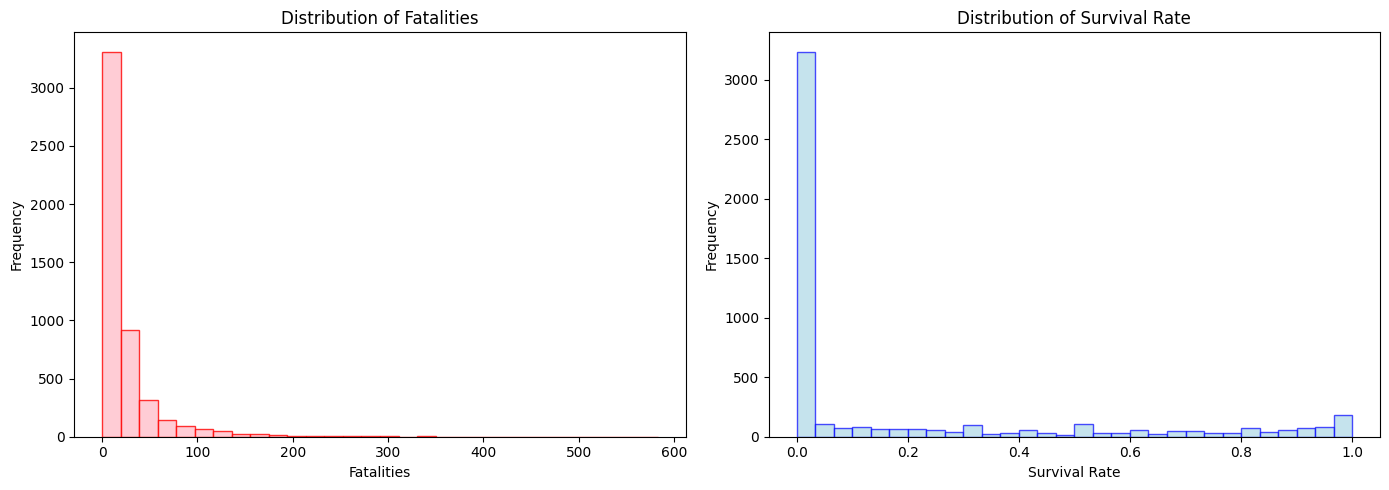

The mean is 22.40, while the median is 11.0, the  variance is 1231.2811776933 and the standard deviation is 35.08961637996774
The mean is 0.18, while the median is 0.0, the  variance is 0.09716216799316243 and the standard deviation is 0.31170846634822486
T-statistic: -0.225
P-value: 0.82212
Mean fatalities in 1950s: 26.547169811320753
Mean fatalities in 2000s: 27.26382978723404


In [18]:
#Task 3 - Statistical Analysis:
##Apply SciPy to analyze the distribution of fatalities and survival rates.
import numpy as np
import scipy as stats
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

series1 = df_process['Fatalities']
series2 = df_process['survival_rate']

plt.figure(figsize=(14,5))

# Fatalities histogram
plt.subplot(1, 2, 1)
plt.hist(series1.dropna(), bins=30, alpha=0.8, edgecolor='red', color='pink')
plt.title('Distribution of Fatalities')
plt.xlabel('Fatalities')
plt.ylabel('Frequency')

# Survival rate histogram
plt.subplot(1, 2, 2)
plt.hist(series2.dropna(), bins=30, alpha=0.7, edgecolor='blue', color='lightblue')
plt.title('Distribution of Survival Rate')
plt.xlabel('Survival Rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##Calculate key statistics like mean, median, and standard deviation.
fatalities = df_process['Fatalities']

mean_scipy = stats.tmean(fatalities)
median_scipy = np.median(fatalities)  # SciPy does not have a separate median function
variance_scipy = stats.tvar(fatalities)
std_dev_scipy = stats.tstd(fatalities)

print(f'The mean is {mean_scipy:.2f}, while the median is {median_scipy}, the  variance is {variance_scipy} and the standard deviation is {std_dev_scipy}')


survivalr = df_process['survival_rate'].dropna()

mean_scipy = stats.tmean(survivalr)
median_scipy = np.median(survivalr)  # SciPy does not have a separate median function
variance_scipy = stats.tvar(survivalr)
std_dev_scipy = stats.tstd(survivalr)

print(f'The mean is {mean_scipy:.2f}, while the median is {median_scipy}, the  variance is {variance_scipy} and the standard deviation is {std_dev_scipy}')

##Conduct a hypothesis test (e.g., comparing the average number of fatalities in different decades or regions).

df_process['Decade'] = (df_process['Date'].dt.year // 10) * 10

fatalities_1960s = df_process[df_process['Decade'] == 1960]['Fatalities'].dropna()
fatalities_2010s = df_process[df_process['Decade'] == 2010]['Fatalities'].dropna()

#Null Hypothesis: The average number of fatalities per crash is the same in the 1950s and 2000s.

#Alternative hypothesis: The average number of fatalities per crash is different between these two decades.

t_stat, p_val = stats.ttest_ind(fatalities_1960s, fatalities_2010s, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.5f}")

print("Mean fatalities in 1950s:", fatalities_1960s.mean())
print("Mean fatalities in 2000s:", fatalities_2010s.mean())


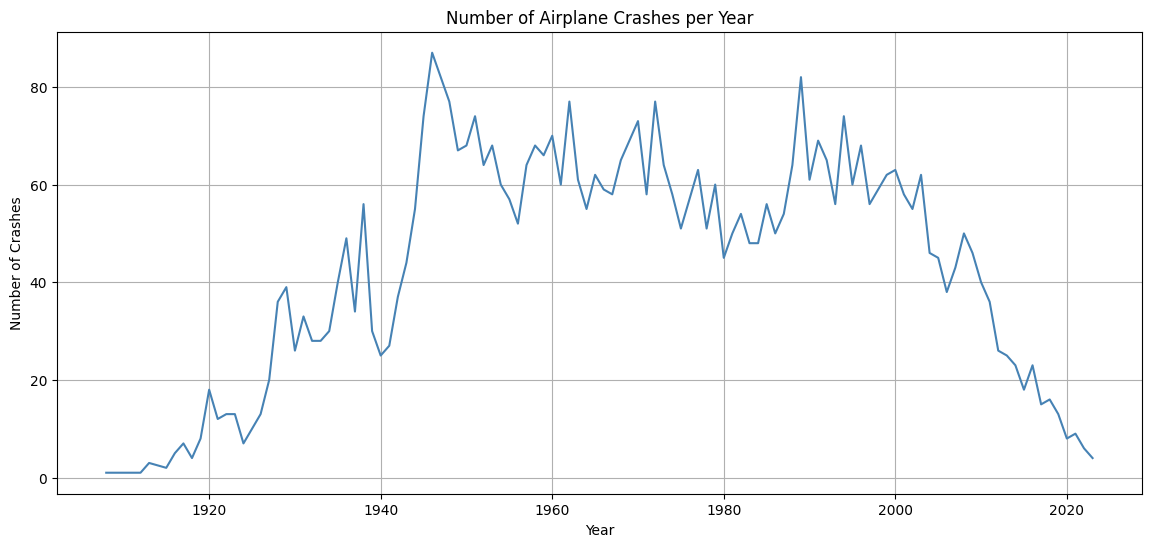

In [19]:
#Task 4 - Visualization: Create charts and graphs using Matplotlib and Seaborn to visualize the findings from your exploratory data analysis and statistical tests. Examples might include time series plots of crashes over years, bar charts of crashes by region, and histograms of fatalities.

import matplotlib.pyplot as plt
import seaborn as sns

crashes_per_year = df_process['Year'].value_counts().sort_index()

# Plot time series
plt.figure(figsize=(14,6))
plt.plot(crashes_per_year.index, crashes_per_year.values, color='steelblue')
plt.title('Number of Airplane Crashes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()
